In [140]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [141]:
house = pd.read_csv ("/HousePrices_HalfMil.csv")

In [142]:
house.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [143]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [144]:
#check null values
house.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [145]:
#remove null value
house.dropna(subset=['Prices'], inplace=True)
house.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [146]:
house.shape

(500000, 16)

In [147]:
#Find correlations with price, which variabels are the biggest predictors
pearsoncorr = house.corr(method='pearson')
pearsoncorr

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.00000,-0.00090,0.00037,-0.00040,0.00253,-0.00148,-0.00105,-0.00078,-0.00345,0.00053,-0.00013,0.00011,-0.00123,0.00061,0.00143,0.14772
Garage,-0.00090,1.00000,0.00131,-0.00365,0.00054,0.00185,-0.00239,-0.00093,0.00079,0.00148,0.00078,-0.00056,-0.00217,0.00109,-0.00067,0.10029
FirePlace,0.00037,0.00131,1.00000,0.00064,0.00095,-0.00092,-0.00003,0.00019,-0.00021,-0.00031,0.00134,0.00182,-0.00037,0.00129,0.00023,0.08914
Baths,-0.00040,-0.00365,0.00064,1.00000,0.00249,-0.00274,0.00025,-0.00088,-0.00086,-0.00075,0.00105,-0.00069,-0.00167,0.00221,0.00172,0.14509
White Marble,0.00253,0.00054,0.00095,0.00249,1.00000,-0.49889,-0.50072,0.00008,-0.00086,-0.00158,0.00056,-0.00058,-0.00040,-0.00190,0.00096,0.44815
Black Marble,-0.00148,0.00185,-0.00092,-0.00274,-0.49889,1.00000,-0.50038,-0.00037,-0.00032,0.00176,-0.00055,0.00007,0.00009,0.00071,0.00013,-0.07805
Indian Marble,-0.00105,-0.00239,-0.00003,0.00025,-0.50072,-0.50038,1.00000,0.00029,0.00118,-0.00018,-0.00001,0.00050,0.00032,0.00118,-0.00109,-0.36976
Floors,-0.00078,-0.00093,0.00019,-0.00088,0.00008,-0.00037,0.00029,1.00000,-0.00064,-0.00265,0.00008,0.00137,-0.00001,-0.00021,-0.00049,0.61945
City,-0.00345,0.00079,-0.00021,-0.00086,-0.00086,-0.00032,0.00118,-0.00064,1.00000,0.00049,0.00079,-0.00272,0.00077,0.00032,0.00121,0.23326
Solar,0.00053,0.00148,-0.00031,-0.00075,-0.00158,0.00176,-0.00018,-0.00265,0.00049,1.00000,0.00188,0.00024,-0.00082,-0.00047,-0.00426,0.00843


In [148]:
#Order correlations
house.corr()['Prices'].sort_values()

Indian Marble   -0.36976
Black Marble    -0.07805
Garden           0.00154
Swiming Pool     0.00179
Solar            0.00843
Electric         0.05244
FirePlace        0.08914
Garage           0.10029
Baths            0.14509
Area             0.14772
Glass Doors      0.18197
City             0.23326
White Marble     0.44815
Fiber            0.48463
Floors           0.61945
Prices           1.00000
Name: Prices, dtype: float64

In [149]:
#Best predictors were Floors, White marble, indian marble and Fiber

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
Xt = house.loc[:,'Area':'Garden']

X = house[['Floors', 'Fiber', 'White Marble', 'Indian Marble']]
y = house['Prices']

Xt

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,128,3,4,2,1,0,0,1,2,0,1,0,1,1,1
499996,30,2,4,5,0,0,1,0,1,0,0,1,0,0,1
499997,174,3,3,2,0,1,0,1,1,1,1,1,0,1,0
499998,121,1,4,5,0,1,0,1,3,0,1,1,1,0,0


In [152]:
#Regression for total dataset
regg = LinearRegression().fit(Xt, y)
regg.score(Xt, y)

1.0

In [153]:
#Regression for Chosen predictor variables
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8471239384192804

In [154]:
print(reg.coef_, reg.intercept_)

[14987.98694729 11724.54360995  9020.48826236 -4990.465463  ] 27362.241614153158


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
#Train/test split model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_train.shape, y_train.shape

((350000, 4), (350000,))

In [157]:
X_test.shape, y_test.shape

((150000, 4), (150000,))

In [158]:
#create model and Fit
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [159]:
#train results
#Score for train
tR2 = model.score(X_train, y_train)
trainp = model.predict(X_train)
#Root Square Mean Error
tRMSE = np.sqrt(metrics.mean_squared_error(y_train, trainp))

In [160]:
print(model.coef_, model.intercept_)

[14982.59381292 11738.66302247  9029.73851265 -4998.56657027] 27360.10115303475


In [161]:
#Score for test
model.score(X_test, y_test)

0.846628197956717

In [162]:
#Coefficients for each variable
coeff = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff

,Coefficient
Floors,14982.59381
Fiber,11738.66302
White Marble,9029.73851
Indian Marble,-4998.56657


In [163]:
#Get Y predictions
y_pred = model.predict(X_test)
y_pred

array([34100.19760524, 39098.7641755 , 54081.35798843, ...,
       34100.19760524, 54081.35798843, 39098.7641755 ])

In [164]:
#Find values (R square, rmse, mse, mae, mape)


#R square for training
#R2t = metrics.r2_score(y_train, y_pred)
#R Square
R2 = metrics.r2_score(y_test, y_pred)
#Mean Absolute Error
MAE = metrics.mean_absolute_error(y_test, y_pred)
#Mean Squared Error
MSE = metrics.mean_squared_error(y_test, y_pred)
#Root Square Mean Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#Mape
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

R2

0.846628197956717

In [165]:
#from sklearn.model_selection import cross_validate

#crossv = cross_validate(model, X, y, cv=4, scoring=('r2'))


**Linear Regression Cross Validation (4fold)**

In [166]:
from sklearn.model_selection import cross_val_predict

crosspred = cross_val_predict(model, X, y, cv=4)


lcvR2 = metrics.r2_score(y, crosspred)
#Mean Absolute Error
lcvMAE = metrics.mean_absolute_error(y, crosspred)
#Mean Squared Error
lcvMSE = metrics.mean_squared_error(y, crosspred)
#Root Square Mean Error
lcvRMSE = np.sqrt(metrics.mean_squared_error(y, crosspred))
#Mape
lcvmape = metrics.mean_absolute_percentage_error(y, crosspred)

**Predictor Variables Coefficients**

In [167]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

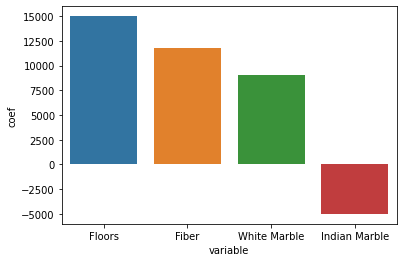

In [168]:
view_coeff(X, model)

**Lasso**

In [169]:
from sklearn.linear_model import Lasso, LassoCV

In [170]:
lasso = Lasso()

lasso.fit(X_test, y_test)

Lasso()

In [171]:
ltR2 = lasso.score(X_train, y_train)
ltR2

tlas = lasso.predict(X_train)
lrmse = np.sqrt(metrics.mean_squared_error(y_train, tlas))

In [172]:
lassop = lasso.predict(X_test)


In [173]:

#R Square
lR2 = metrics.r2_score(y_test, lassop)
#Mean Absolute Error
lMAE = metrics.mean_absolute_error(y_test, lassop)
#Mean Squared Error
lMSE = metrics.mean_squared_error(y_test, lassop)
#Root Square Mean Error
lRMSE = np.sqrt(metrics.mean_squared_error(y_test, lassop))
#Mape
lmape = metrics.mean_absolute_percentage_error(y_test, lassop)



In [174]:
optimal_lasso = LassoCV(cv=4)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

lassocvp = optimal_lasso.predict(X)

#R Square
lR2cv = metrics.r2_score(y, lassocvp)
#Mean Absolute Error
lMAEcv = metrics.mean_absolute_error(y, lassocvp)
#Mean Squared Error
lMSEcv = metrics.mean_squared_error(y, lassocvp)
#Root Square Mean Error
lRMSEcv = np.sqrt(metrics.mean_squared_error(y, lassocvp))
#Mape
lmapecv = metrics.mean_absolute_percentage_error(y, lassocvp)

Alpha: 3.750841760560898
Score: 0.8471226002579866


**Grid Search (Lasso)**

In [175]:
from sklearn.model_selection import GridSearchCV


In [176]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 4

GSlasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
GSlasso.fit(X, y)

GridSearchCV(cv=4, estimator=Lasso(max_iter=10000, random_state=0),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}])

In [177]:
GSLpredict = GSlasso.predict(X)

In [178]:
#R Square
lR2gs = metrics.r2_score(y, GSLpredict)
#Mean Absolute Error
lMAEgs = metrics.mean_absolute_error(y, GSLpredict)
#Mean Squared Error
lMSEgs = metrics.mean_squared_error(y, GSLpredict)
#Root Square Mean Error
lRMSEgs = np.sqrt(metrics.mean_squared_error(y, GSLpredict))
#Mape
lmapegs = metrics.mean_absolute_percentage_error(y, GSLpredict)

**Ridge**

In [179]:
from sklearn.linear_model import Ridge, RidgeCV

In [180]:
ridge = Ridge()

ridge.fit(X_test, y_test)

Ridge()

In [181]:
rtR2 = ridge.score(X_train, y_train)
rtR2

tridge = ridge.predict(X_train)
rrmse = np.sqrt(metrics.mean_squared_error(y_train, tridge))

In [182]:
ridgep = ridge.predict(X_test)

In [183]:

#Root Square Mean Error
rRMSE = np.sqrt(metrics.mean_squared_error(y_test, ridgep))
#R Square
rR2 = metrics.r2_score(y_test, ridgep)
#Mean Absolute Error
rMAE = metrics.mean_absolute_error(y_test, ridgep)
#Mean Squared Error
rMSE = metrics.mean_squared_error(y_test, ridgep)
#Mape
rmape = metrics.mean_absolute_percentage_error(y_test, ridgep)

rR2

0.8466368597921454

**Ridge Cross Validation (4fold)**

In [184]:
optimal_ridge = RidgeCV(cv=4)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

ridgecvp = optimal_ridge.predict(X)

#Root Square Mean Error
rRMSEcv = np.sqrt(metrics.mean_squared_error(y, ridgecvp))
#R Square
rR2cv = metrics.r2_score(y, ridgecvp)
#Mean Absolute Error
rMAEcv = metrics.mean_absolute_error(y, ridgecvp)
#Mean Squared Error
rMSEcv = metrics.mean_squared_error(y, ridgecvp)
#Mape
rmapecv = metrics.mean_absolute_percentage_error(y, ridgecvp)

rR2cv

Alpha: 0.1
Score: 0.8471239384187854


0.8471239384187854

**Results table**

In [185]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

results = pd.DataFrame({'Method': ['Linear Regression', 'Lasso', 'Ridge'], 'Training rmse': [tRMSE, lrmse, rrmse], 'R2': [R2, lR2, rR2], 'rmse':[RMSE, lRMSE, rRMSE], 'mse':[MSE, lMSE, rMSE], 'mae':[MAE, lMAE, rMAE], 'mape':[mape, lmape, rmape]} )

results

,Method,Training rmse,R2,rmse,mse,mae,mape
0,Linear Regression,4733.72488,0.84663,4738.08579,22449456.98265,3841.67059,0.10302
1,Lasso,4733.87850,0.84664,4737.95345,22448202.89480,3841.48201,0.10303
2,Ridge,4733.85985,0.84664,4737.95200,22448189.12572,3841.49461,0.10303


The results table fo reach method shows that there was not much difference between the methods with almost all metrics being very similar. Each method showed a high accuracy of prediction for this model of data.

In [186]:
crossVD = pd.DataFrame({'Method': ['Linear RegressionCV', 'LassoCV', 'Lasso GridSearchCV','RidgeCV' ],'R2': [lcvR2, lR2cv, lR2gs, rR2cv], 'rmse':[lcvRMSE, lRMSEcv, lRMSEgs, rRMSEcv], 'mse':[lcvMSE, lMSEcv, lMSEgs, rMSEcv], 'mae':[lcvMAE, lMAEcv, lMAEgs, rMAEcv], 'mape':[lcvmape, lmapecv, lmapegs, rmapecv]} )
crossVD

,Method,R2,rmse,mse,mae,mape
0,Linear RegressionCV,0.84712,4735.04942,22420692.97895,3837.81224,0.10287
1,LassoCV,0.84712,4735.04226,22420625.16244,3837.79346,0.10289
2,Lasso GridSearchCV,0.84712,4735.02153,22420428.91098,3837.78302,0.10287
3,RidgeCV,0.84712,4735.02153,22420428.91105,3837.78302,0.10287


With cross validation applied ot each method it didnt change the accuracy much at all. This could be because the accuracy was alrrady high for each method before cross validation was applied. Grid Search applied on lasso did not change the results very much for any metric. 